In [ ]:
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
demo = pd.read_csv("concrete.csv")

In [ ]:
demo.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


Pairplot

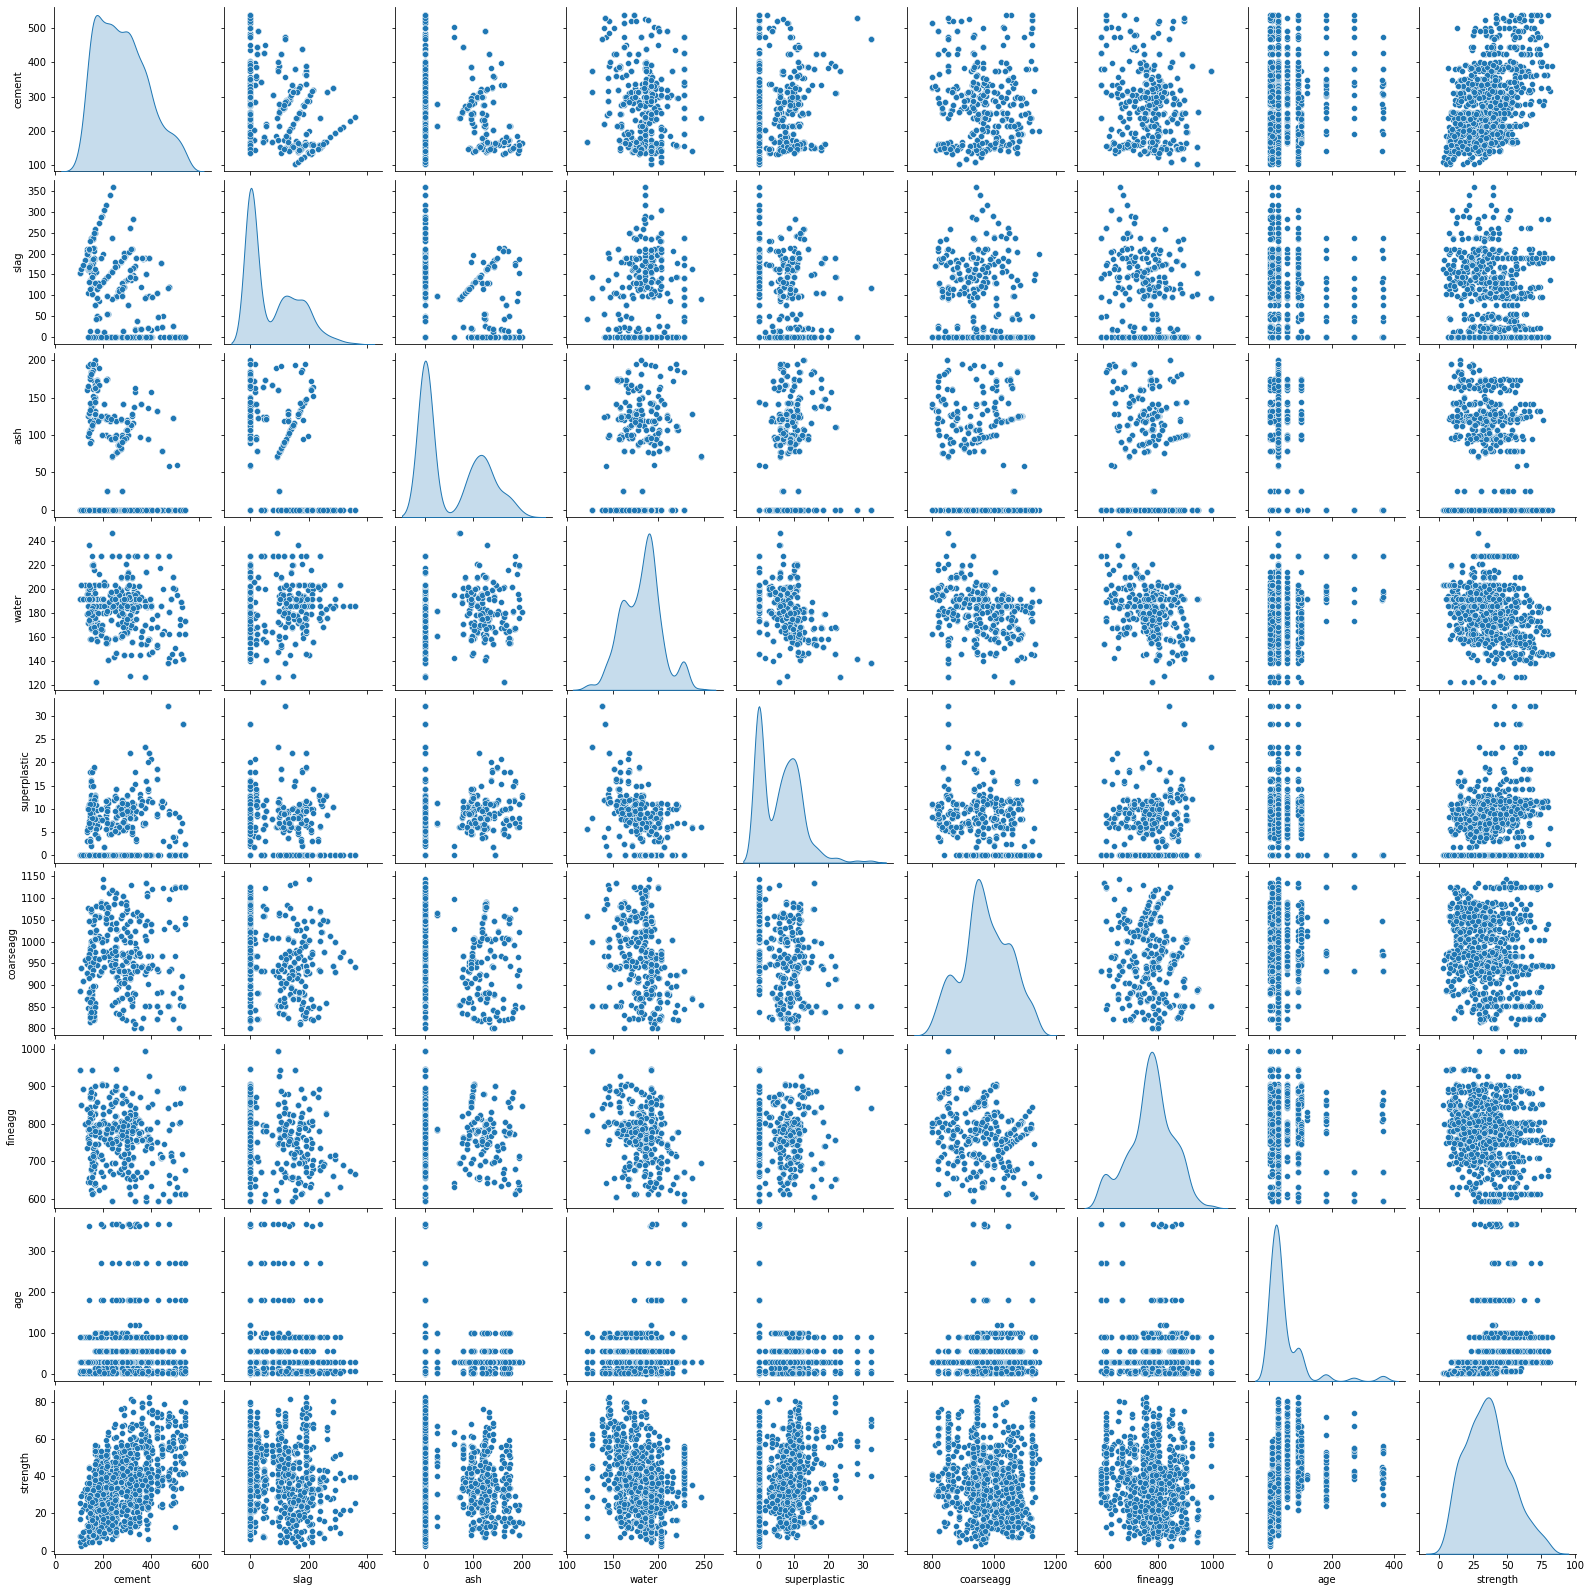

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(demo,diag_kind='kde')

0.5094811788717731


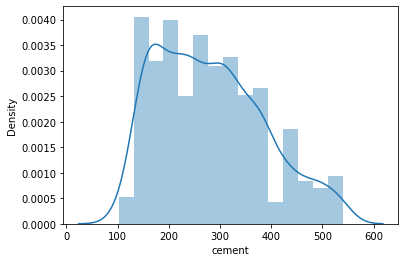

In [ ]:
print((demo['cement']).skew())
sns.distplot(demo['cement'],kde=True)

-0.12977484925075153


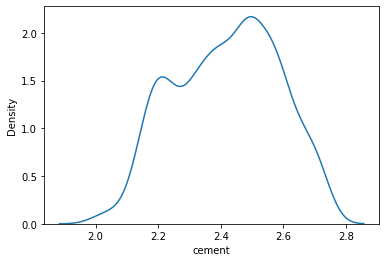

In [ ]:
import numpy as np
print((np.log10(demo['cement']).skew()))
sns.distplot(np.log10(demo['cement']),hist=False)

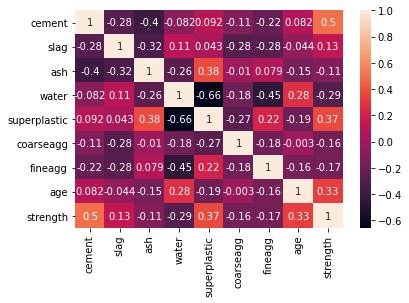

In [ ]:
import seaborn as sns
sns.heatmap(demo.corr(),annot=True)

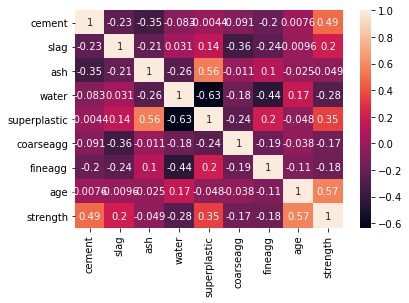

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
powerdemo = pd.DataFrame(pt.fit_transform(demo))
powerdemo.columns = demo.columns
sns.heatmap(powerdemo.corr(),annot=True)

In [ ]:
demo.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
demo = pd.read_csv("concrete.csv")
X=demo.drop('strength',axis=1)
y=demo['strength']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
lr=LinearRegression()
lr.fit(Xtrain,ytrain)
print("Training R2")
print(lr.score(Xtrain,ytrain))
print("Testing R2")
print(lr.score(Xtest,ytest))
predicted = lr.predict(Xtest)
print("RMSE")
print(np.sqrt(mean_squared_error(predicted, ytest)))

Training R2
0.6374354064424276
Testing R2
0.502237599588723
RMSE
11.524475667462383


In [ ]:
print(lr.coef_)
print(lr.intercept_)

[ 0.12068077  0.10914187  0.08314973 -0.12390371  0.37033463  0.02439871
  0.02402977  0.12431106]
-38.181971992206954


In [ ]:
from sklearn.preprocessing import StandardScaler
demo = pd.read_csv("concrete.csv")
X=demo.drop('strength',axis=1)
y=demo['strength']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pt = StandardScaler()
ptXtrain = pt.fit_transform(Xtrain)
ptXtest = pt.transform(Xtest)
lr=LinearRegression()
lr.fit(ptXtrain,ytrain)
print("Training R2")
print(lr.score(ptXtrain,ytrain))
print("Testing R2")
print(lr.score(ptXtest,ytest))
predicted = lr.predict(ptXtest)

Training R2
0.8069340752326601
Testing R2
0.7878651832591684
RMSE
7.523433868023823


In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline((
("pt", StandardScaler()),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
predicted = pipe.predict(Xtest)

Training R2
0.8069340752326601
Testing R2
0.7878651832591684
Test RMSE
7.523433868023823
